<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Author:-Everett-Wetchler-(everett.wetchler@gmail.com)" data-toc-modified-id="Author:-Everett-Wetchler-(everett.wetchler@gmail.com)-0.0.0.1"><span class="toc-item-num">0.0.0.1&nbsp;&nbsp;</span>Author: Everett Wetchler (<a href="mailto:everett.wetchler@gmail.com" target="_blank">everett.wetchler@gmail.com</a>)</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#[-Setup-and-load-data-]" data-toc-modified-id="[-Setup-and-load-data-]-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>[ Setup and load data ]</a></span><ul class="toc-item"><li><span><a href="#[-Load-data-]" data-toc-modified-id="[-Load-data-]-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>[ Load data ]</a></span></li><li><span><a href="#[-Define-some-variables-and-new-columns-for-convenience]" data-toc-modified-id="[-Define-some-variables-and-new-columns-for-convenience]-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>[ Define some variables and new columns for convenience]</a></span></li></ul></li><li><span><a href="#[-Analyses-]" data-toc-modified-id="[-Analyses-]-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>[ Analyses ]</a></span></li></ul></div>

<img src="img/TJI_logo_whitebg_440x220.jpg" alt="drawing" style="width: 220px;float: right"/>

# Analysis: Pre-booking deaths in custody, 2006-2019


##### Author: Everett Wetchler (everett.wetchler@gmail.com)

## [ Setup and load data ]

In [1]:
import datadotworld as dw
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

%matplotlib inline

%load_ext watermark
%watermark -a 'Everett Wetchler' -g -d -t -z -w -p numpy,pandas,matplotlib,seaborn,datadotworld

Everett Wetchler 2020-06-06 03:39:40 PDT 

numpy 1.17.4
pandas 0.25.3
matplotlib 3.1.1
seaborn 0.7.1
datadotworld 1.7.0
Git hash: 13cc14a2bf57fbe41994a4dd50710e55956a4b4c
watermark 2.0.1


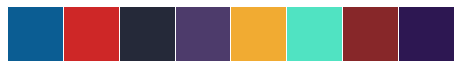

In [2]:
from lib.utils import *
from lib.style import *

sns.palplot(sns.color_palette())

# plotsaver = PlotSaver('../plots/2020_CDR', 'cdr', numbering=False)

### [ Load data ]

In [3]:
datasets = dw.load_dataset('tji/deaths-in-custody', force_update=True)
cdr = datasets.dataframes['cleaned_custodial_death_reports']

/Users/everettwetchler/.pyenv/versions/3.6.5/envs/tji/lib/python3.6/site-packages/datadotworld/models/dataset.py:209: UserWarning: Unable to set data frame dtypes automatically using cleaned_custodial_death_reports schema. Data types may need to be adjusted manually. Error: Bool column has NA values in column 27
  'Error: {}'.format(resource_name, e))


In [4]:
for col in cdr.columns:
    if 'date' in col.split('_'):
        print(f"Converting {col} to datetime")
        cdr[col] = pd.to_datetime(cdr[col])

Converting report_date to datetime
Converting date_time_of_custody_or_incident to datetime
Converting date_of_birth to datetime
Converting death_date to datetime
Converting death_date_and_time to datetime
Converting facility_entry_date_time to datetime


In [5]:
start, end = min(cdr.death_date_and_time), max(cdr.death_date_and_time)
FMT = '%b %d, %Y'
print("First reported death is on %s -- last is on %s" % (start.strftime(FMT), end.strftime(FMT)))
cdr.head()

First reported death is on Jan 01, 2005 -- last is on May 30, 2020


,record_id,num_revisions,form_version,report_date,date_time_of_custody_or_incident,name_first,name_last,name_middle,name_suffix,name_full,date_of_birth,age_at_time_of_death,sex,race,death_date,death_date_and_time,death_location_county,death_location_city,death_location_street_address,death_location_type,death_location_type_other,death_from_pre_existing_medical_condition,manner_of_death,manner_of_death_description,means_of_death,means_of_death_other,medical_cause_of_death,medical_examinor_coroner_evalution,medical_treatment,days_from_custody_to_death,who_caused_death_in_homicide_or_accident,who_caused_death_in_homicide_or_accident_other,offense_1,offense_2,offense_3,type_of_offense,type_of_offense_other,were_the_charges,facility_entry_date_time,type_of_custody,specific_type_of_custody_facility,agency_address,agency_city,agency_county,agency_name,agency_zip,type_of_restraint,under_restraint,entry_behavior,other_behavior,exhibit_any_medical_problems,exhibit_any_mental_health_problems,make_suicidal_statements
0,PA06004CJ,0.0,V_2005,2006-02-16 15:26:00,2004-01-11 12:00:00,RUBEN,BLANCO-POTT,ALBERTO,NaN,RUBEN ALBERTO BLANCO-POTT,1968-05-07,37.0,MALE,OTHER,2006-01-05,2006-01-05 02:45:00,KARNES,KARNES CITY,810 COMMERCE ST.,MEDICAL FACILITY,NaN,YES,NATURAL CAUSES/ILLNESS,AIDS SYNDROME / URINARY SEPSIS,NOT APPLICABLE,NaN,AIDS SYNDROME / URINARY SEPSIS,False,YES,724.0,NOT APPLICABLE,NaN,ILLEGAL REENTRY,NaN,NaN,NaN,ILLEGAL REENTRY,CONVICTED,2004-01-11 12:00:00,JAIL - COUNTY,HOSPITAL/INFIRMARY,113 N. PANNA MARIA ST.,KARNES CITY,KARNES,KARNES CO SHERIFFS OFFICE,78118.0,NaN,NO,MEDICAL,NaN,NaN,NaN,NaN
1,PA15069C,0.0,V_2005,2015-02-19 09:51:00,2015-02-03 11:45:00,WILBER,GONGORA,CASTILLO,NaN,WILBER CASTILLO GONGORA,1980-01-09,35.0,MALE,HISPANIC,2015-02-04,2015-02-04 19:42:00,WICHITA,ELECTRA,U.S. 287 @ U.S. 287 BUS H,MEDICAL FACILITY,NaN,UNKNOWN,"OTHER, SPECIFY",RULED NOT DETERMINED BY MEDICAL EXAMINER,"OTHER, SPECIFY",UNKNOWN,HYPERTENSIVE HEART DISEASE WITH METHAMPHETMAIN...,True,NOT APPLICABLE,1.0,UNKNOWN,NaN,EVADING ARREST/DETENTION,RESISTING ARREST,NaN,NaN,OBSTRUCTION OF GOVERNMENTAL OPERATION,NOT FILED AT TIME OF DEATH,NaT,POLICE CUSTODY (PRE-BOOKING),CUSTODY OF LAW ENFORCEMENT PERSONNEL DURING/FL...,P. O. BOX 8466,WICHITA FALLS,WICHITA,WICHITA CO SHERIFFS OFFICE,76307.0,NaN,YES,NaN,NaN,NaN,NaN,NaN
2,PA16489PF,0.0,V_2005,2016-10-25 13:05:00,2016-01-28 20:01:00,JOSHUA,TOYIN OLUBUNMI,NaN,NaN,JOSHUA TOYIN OLUBUNMI,1962-06-01,54.0,FEMALE,OTHER,2016-10-24,2016-10-24 23:18:00,HASKELL,HASKELL,1 AVENUE N,MEDICAL FACILITY,NaN,UNKNOWN,NATURAL CAUSES/ILLNESS,PENDING,NOT APPLICABLE,NaN,AUTOPSY PENDING,False,YES,270.0,NOT APPLICABLE,NaN,FAIL TO ID,PASSING COUNTERFEIT MONEY,NaN,NaN,FRAUD,CONVICTED,2016-10-24 22:40:00,PRIVATE FACILITY,OTHER,118 CR 206,HASKELL,HASKELL,ROLLING PLAINS REGIONAL JAIL AND DETENTION CENTER,79521.0,NaN,NO,NaN,NaN,NaN,NaN,NaN
3,19-622-PF,0.0,V_2016,2019-06-25 11:16:00,2019-05-06 05:45:00,PATRICK,DUPRE,PAUL,NaN,PATRICK PAUL DUPRE,1981-10-20,37.0,MALE,WHITE,2019-06-01,2019-06-01 01:30:00,WILLIAMSON,GEORGETOWN,306 W. FOURTH ST.,MEDICAL FACILITY,NaN,NOT APPLICABLE,SUICIDE,NaN,"HANGING, STRANGULATION",NaN,THIS INFORMATION IS PENDING THE RESULTS OF THE...,True,NOT APPLICABLE,25.0,NOT APPLICABLE,NaN,ARSON,BURGLARY OF HABITATION,TAMPER/FABRICATE PHYS EVIDENCE WITH INTENT TO ...,ALCOHOL / DRUG OFFENSE; CRIME AGAINST PROPERTY,NaN,FILED,2019-05-06 05:45:00,PRIVATE FACILITY,HOSPITAL/INFIRMARY,508 S. ROCK STREET,GEORGETOWN,WILLIAMSON,WILLIAMSON CO SHERIFFS OFFICE,78626.0,NaN,NO,NaN,NaN,NO,NO,NO
4,18-417-CJ,1.0,V_2016,2019-06-25 14:17:00,2017-07-01 00:59:00,KENNETH,CARNER,ALAN,NaN,KENNETH ALAN CARNER,1961-01-04,57.0,MALE,WHITE,2018-04-29,2018-04-29 14:47:00,SMITH,TYLER,CR 35 & LOOP 323,MEDICAL FACILITY,NaN,NOT APPLICABLE,HOMICIDE,NaN,FIREARM,NaN,COMPLICATIONS OF A REMOTE GUNSHOT WOUND OF THE...,True,YES,302.0,LAW ENFORCEMENT/CORRECTIONAL PERSONNEL,NaN,ASSAULT PUBLIC SERVANT,ATTEMPT TO TAKE WEAPON FROM OFFICER,PAROLE VIOLATION,"OTHER, SPECIFY",TR

### [ Define some variables and new columns for convenience]

In [6]:
# Define these as variables so we don't have to worry about mistyping
# them in myriad filters later.
CUSTODY_POLICE = 'POLICE CUSTODY\n(PRE-BOOKING)'
CUSTODY_JAIL = 'JAIL'
CUSTODY_PRISON = 'PRISON'
NATURAL_DEATH = 'NATURAL CAUSES/ILLNESS'

# Add a newline in this particular value so it prints nicely in charts
cdr.loc[cdr.type_of_custody == 'POLICE CUSTODY (PRE-BOOKING)', 'type_of_custody'] = CUSTODY_POLICE

# Add some extra columns for convenience
cdr['death_year'] = cdr.death_date_and_time.dt.year
cdr['suicide'] = cdr.manner_of_death == 'SUICIDE'
cdr['natural_death'] = cdr.manner_of_death == NATURAL_DEATH

# Filtered dataframes for convenience
police = cdr[cdr.type_of_custody == CUSTODY_POLICE]
jail = cdr[cdr.type_of_custody == CUSTODY_JAIL]
prison = cdr[cdr.type_of_custody == CUSTODY_PRISON]

# For year-over-year analyses, we ignore 2005 and 2020 data as they may not be full years
cdr_fullyears = cdr[(cdr.death_year > 2005) & (cdr.death_year < 2020)]
police_fullyears = police[(police.death_year > 2005) & (police.death_year < 2020)]
num_years = 2020 - 2005 + 1

# For this analysis, we only care about pre-booking deaths
cdr = police_fullyears

## [ Analyses ]

Text(0.5, 1.0, 'Pre-booking custodial deaths, by year')

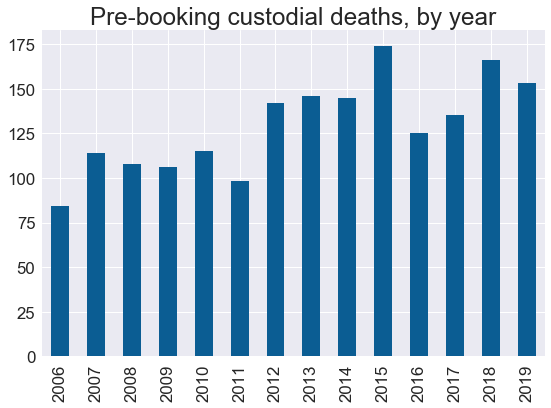

In [7]:
fig, ax = plt.subplots(1)
cdr.death_date_and_time.dt.year.value_counts().sort_index().plot(kind='bar', ax=ax, color=TJI_BLUE)
ax.set_title('Pre-booking custodial deaths, by year')

(0, 178.5)

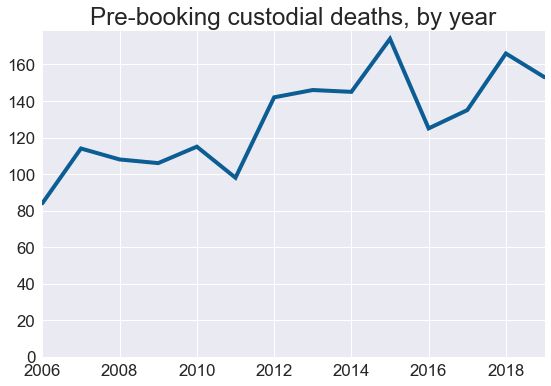

In [8]:
fig, ax = plt.subplots(1)
cdr.death_date_and_time.dt.year.value_counts().sort_index().plot(kind='line', ax=ax, color=TJI_BLUE)
ax.set_title('Pre-booking custodial deaths, by year')
ax.set_ylim(0, ax.get_ylim()[1])

In [9]:
def rename_county(c):
    if pd.isnull(c):
        return None
    return '_'.join(c.lower().split())

cdr['death_location_county'] = cdr['death_location_county'].apply(rename_county)

/Users/everettwetchler/.pyenv/versions/3.6.5/envs/tji/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
datasets = dw.load_dataset('tji/auxiliary-datasets', force_update=True)
census = datasets.dataframes['census_data_by_county']
county_populations = census[census['metric_description'] == 'Population estimates, July 1, 2017,  (V2017)'].iloc[0, 3:]
county_populations.head()

anderson    57741
andrews     17722
angelina    87805
aransas     25572
archer       8809
Name: 48, dtype: object

In [11]:
counties_urban = []
counties_suburban = []
counties_rural = []
pop_urban = pop_suburban = pop_rural = 0
for county, pop in county_populations.items():
    if pop < 2500:
        counties_rural.append(county)
        pop_rural += pop
    elif pop < 50000:
        counties_suburban.append(county)
        pop_suburban += pop
    else:
        counties_urban.append(county)
        pop_urban += pop

In [12]:
def get_county_size(county):
    if pd.isnull(county):
        return None
    if county in counties_urban:
        return 'urban'
    if county in counties_suburban:
        return 'suburban'
    if county in counties_rural:
        return 'rural'
    raise Exception(f"County {county} not recognized")

cdr['county_size'] = cdr['death_location_county'].apply(get_county_size)

/Users/everettwetchler/.pyenv/versions/3.6.5/envs/tji/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [13]:
deaths_by_county_size = cdr.groupby('county_size').size()
deaths_by_county_size

county_size
rural          3
suburban     179
urban       1482
dtype: int64

In [99]:
frame = pd.DataFrame([
    ['Rural Areas', deaths_by_county_size.loc['rural'], pop_rural],
    ['Urban Clusters', deaths_by_county_size.loc['suburban'], pop_suburban],
    ['Urban Areas', deaths_by_county_size.loc['urban'], pop_urban],
], columns=['county_size', 'deaths', 'population'])
frame = frame.set_index('county_size', drop=True)
frame['rate'] = (frame['deaths'] * 1e6 / frame['population']) / num_years
frame

,deaths,population,rate
county_size,,,
Rural Areas,3,32040.0,5.852060
Urban Clusters,179,2851751.0,3.923028
Urban Areas,1482,53725401.0,1.724045


Saving plot to ../plots/2020_CDR/cdr_by_urbanicity.png


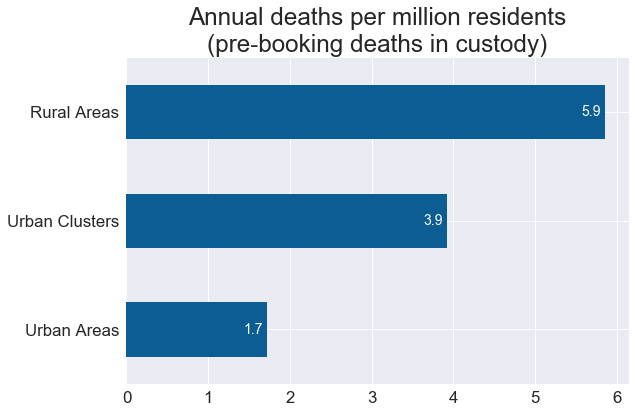

In [100]:
fig, ax = plt.subplots(1)
frame['rate'][::-1].plot(kind='barh', ax=ax)
for i, rate in enumerate(frame['rate']):
    ax.text(rate - 0.05, 2-i, '%.1f' % rate,
            horizontalalignment='right',
            verticalalignment='center',
            color='white')
ax.set_ylabel('')
ax.set_title("Annual deaths per million residents\n(pre-booking deaths in custody)")
plotsaver.saveplot(fig, 'by_urbanicity')

In [21]:
frame = pd.DataFrame(cdr.groupby('manner_of_death').size())
frame.columns = ['deaths']
combine = ['OTHER, SPECIFY', 'ACCIDENTAL', 'ALCOHOL/DRUG INTOXICATION']
frame.loc['OTHER'] = frame.loc[combine, :].sum()
frame = frame.drop(combine, axis=0)
frame.sort_values('deaths', ascending=False, inplace=True)
frame.index = [i.split()[0] for i in frame.index]
frame

,deaths
HOMICIDE,1096
OTHER,397
SUICIDE,268
NATURAL,50


Text(0.5, 1.0, 'Pre-booking custodial deaths\nby manner of death\n')

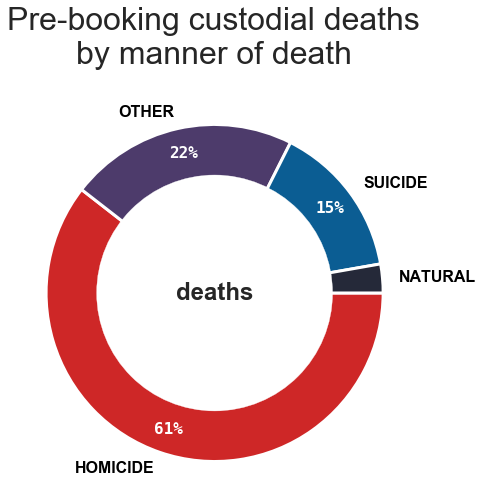

In [32]:
fig, ax = pie_plot(frame, donut=True, figsize=(7, 7),
                   label_size=16,
                   min_pct_for_label=4,
                   colors=[TJI_RED, TJI_PURPLE, TJI_BLUE, TJI_DEEPBLUE])
ax.set_title('Pre-booking custodial deaths\nby manner of death\n', fontsize=32)

In [39]:
frame = pd.DataFrame(cdr.groupby('race').size())
frame.columns = ['deaths']
frame.sort_values('deaths', ascending=False, inplace=True)
frame

,deaths
race,
WHITE,699
HISPANIC,572
BLACK,468
OTHER,38


Text(0.5, 1.0, 'Pre-booking custodial deaths\nby race\n')

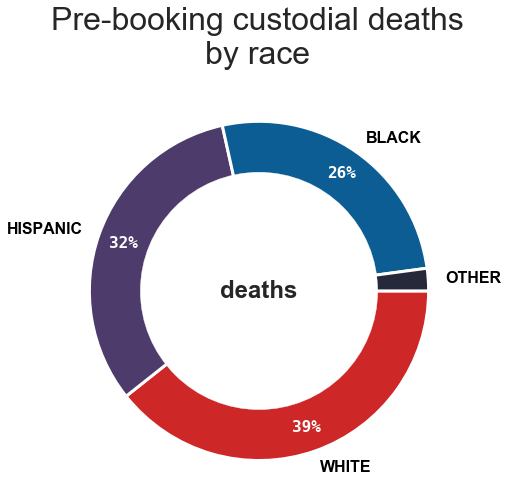

In [40]:
fig, ax = pie_plot(frame, donut=True, figsize=(7, 7),
                   label_size=16,
                   min_pct_for_label=4,
                   colors=[TJI_RED, TJI_PURPLE, TJI_BLUE, TJI_DEEPBLUE])
ax.set_title('Pre-booking custodial deaths\nby race\n', fontsize=32)

In [35]:
cdr.head()

,record_id,num_revisions,form_version,report_date,date_time_of_custody_or_incident,name_first,name_last,name_middle,name_suffix,name_full,date_of_birth,age_at_time_of_death,sex,race,death_date,death_date_and_time,death_location_county,death_location_city,death_location_street_address,death_location_type,death_location_type_other,death_from_pre_existing_medical_condition,manner_of_death,manner_of_death_description,means_of_death,means_of_death_other,medical_cause_of_death,medical_examinor_coroner_evalution,medical_treatment,days_from_custody_to_death,who_caused_death_in_homicide_or_accident,who_caused_death_in_homicide_or_accident_other,offense_1,offense_2,offense_3,type_of_offense,type_of_offense_other,were_the_charges,facility_entry_date_time,type_of_custody,specific_type_of_custody_facility,agency_address,agency_city,agency_county,agency_name,agency_zip,type_of_restraint,under_restraint,entry_behavior,other_behavior,exhibit_any_medical_problems,exhibit_any_mental_health_problems,make_suicidal_statements,death_year,suicide,natural_death,county_size
1,PA15069C,0.0,V_2005,2015-02-19 09:51:00,2015-02-03 11:45:00,WILBER,GONGORA,CASTILLO,NaN,WILBER CASTILLO GONGORA,1980-01-09,35.0,MALE,HISPANIC,2015-02-04,2015-02-04 19:42:00,wichita,ELECTRA,U.S. 287 @ U.S. 287 BUS H,MEDICAL FACILITY,NaN,UNKNOWN,"OTHER, SPECIFY",RULED NOT DETERMINED BY MEDICAL EXAMINER,"OTHER, SPECIFY",UNKNOWN,HYPERTENSIVE HEART DISEASE WITH METHAMPHETMAIN...,True,NOT APPLICABLE,1.0,UNKNOWN,NaN,EVADING ARREST/DETENTION,RESISTING ARREST,NaN,NaN,OBSTRUCTION OF GOVERNMENTAL OPERATION,NOT FILED AT TIME OF DEATH,NaT,POLICE CUSTODY\n(PRE-BOOKING),CUSTODY OF LAW ENFORCEMENT PERSONNEL DURING/FL...,P. O. BOX 8466,WICHITA FALLS,WICHITA,WICHITA CO SHERIFFS OFFICE,76307.0,NaN,YES,NaN,NaN,NaN,NaN,NaN,2015,False,False,urban
16,19-673-UF,0.0,V_2016,2019-07-11 14:49:00,2019-06-25 06:45:00,TOMAS,HERNANDEZ,NaN,NaN,TOMAS HERNANDEZ,1983-11-27,35.0,MALE,HISPANIC,2019-06-25,2019-06-25 09:46:00,bexar,SAN ANTONIO,IH-37 S @ W. BOYER AVENUE,EN ROUTE TO MEDICAL FACILITY,NaN,NOT APPLICABLE,HOMICIDE,NaN,FIREARM,NaN,GUNSHOT WOUNDS,True,NOT APPLICABLE,0.0,LAW ENFORCEMENT/CORRECTIONAL PERSONNEL,NaN,AGGRAVATED ASSAULT - DEADLY WEAPON - PEACE OFF...,NaN,NaN,VIOLENT CRIME AGAINST PERSONS; MEDICAL / MENTA...,NaN,NOT FILED AT TIME OF DEATH,NaT,POLICE CUSTODY\n(PRE-BOOKING),NaN,315 S. SANTA ROSA,SAN ANTONIO,BEXAR,SAN ANTONIO POLICE DEPT,78207.0,NaN,NO,NaN,NaN,NO,YES,YES,2019,False,False,urban
17,19-679-UF,0.0,V_2016,2019-07-14 12:32:00,2019-07-13 14:00:00,DIJON,WATKINS,NaN,NaN,DIJON WATKINS,1988-07-24,30.0,MALE,BLACK,2019-07-13,2019-07-13 14:00:00,dallas,DALLAS,5000 CRANFILL DRIVE,CRIME/ARREST SCENE,NaN,NOT APPLICABLE,HOMICIDE,NaN,FIREARM,NaN,PENDING AUTOPSY,True,NO,0.0,LAW ENFORCEMENT/CORRECTIONAL PERSONNEL,NaN,AGGRAVATED ASSAULT USING A DEADLY WEAPON,NaN,NaN,VIOLENT CRIME AGAINST PERSONS,NaN,NOT FILED AT TIME OF DEATH,NaT,POLICE CUSTODY\n(PRE-BOOKING),NaN,1400 S. LAMAR STREET,DALLAS,DALLAS,DALLAS POLICE DEPT,75215.0,NaN,NO,NaN,NaN,NO,UNKNOWN,NO,2019,False,False,urban
20,19-671-C,0.0,V_2016,2019-07-11 11:07:00,2019-07-11 09:00:00,JAMES,LUKER,RAY,JR,JAMES RAY LUKER JR,1979-11-26,39.0,MALE,WHITE,2019-07-11,2019-07-11 09:15:00,bastrop,BASTROP,1242 SH 71 W LOT 105,CRIME/ARREST SCENE,NaN,NOT APPLICABLE,SUICIDE,NaN,FIREARM,NaN,UNKNOWN,False,UNKNOWN,0.0,NOT APPLICABLE,NaN,STALKING,EVADING ARREST WITH VEHICLE,NaN,VIOLENT CRIME AGAINST PERSONS,NaN,FILED,NaT,POLICE CUSTODY\n(PRE-BOOKING),CUSTODY OF LAW ENFORCEMENT PERSONNEL AFTER ARREST,200 JACKSON STREET,BASTROP,BASTROP,BASTROP CO SHERIFFS OFFICE,78602.0,NaN,NO,NaN,NaN,NO,NO,NO,2019,True,False,urban
22,19-665-UF,0.0,V_2016,2019-07-10 08:11:00,2019-06-05 19:20:00,SYLVIA,GUERRERO,GALLARDO,NaN,SYLVIA GALLARDO GUERRERO,1977-08-19,41.0,FEMALE,HISPANIC,2019-07-03,2019-07-03 17:08:00,harris,PASADENA,2013 LENNY LANE,MEDICAL FACILITY,NaN,NOT APPLICABLE,SUICIDE,NaN,FIREARM,NaN,COMPLICATIONS OF GUNSHOT WOUND OF THE CHEST,True,NOT APPLICABLE,27.0,NOT APPLICABLE,NaN,NO CHA

In [47]:
offense_counts = {}

In [72]:
for o in cdr['type_of_offense']:
    if pd.isnull(o):
        o = 'OTHER, SPECIFY'
    parts = o.split('; ')
    for p in parts:
        offense_counts[p] = 0

offense_counts

{'OTHER, SPECIFY': 0,
 'VIOLENT CRIME AGAINST PERSONS': 0,
 'MEDICAL / MENTAL HEALTH ASSISTANCE CALL': 0,
 'ALCOHOL / DRUG OFFENSE': 0,
 'CRIME AGAINST PROPERTY': 0,
 'CRIMES AGAINST CHILD(REN)': 0,
 'SERIOUS CRIME AGAINST PROPERTY': 0,
 'SEXUAL ASSAULT OF A CHILD': 0}

In [73]:
for o in cdr['type_of_offense']:
    if pd.isnull(o):
        o = 'OTHER, SPECIFY'
    parts = o.split('; ')
    frac = 1.0 / len(parts)
    for p in parts:
        offense_counts[p] += frac

len(cdr), sum(offense_counts.values())

(1811, 1810.9999999999998)

In [75]:
frame = pd.DataFrame(pd.Series(offense_counts), columns=['deaths'])
combine = ['CRIME AGAINST PROPERTY', 'SERIOUS CRIME AGAINST PROPERTY']
frame.loc['CRIME AGAINST PROPERTY'] = frame.loc[combine, :].sum()
frame = frame.drop('SERIOUS CRIME AGAINST PROPERTY', axis=0)
combine = ['CRIMES AGAINST CHILD(REN)', 'SEXUAL ASSAULT OF A CHILD']
frame.loc['CRIMES AGAINST CHILD(REN)'] = frame.loc[combine, :].sum()
frame = frame.drop('SEXUAL ASSAULT OF A CHILD', axis=0)
frame.drop('OTHER, SPECIFY', axis=0, inplace=True)
frame

,deaths
VIOLENT CRIME AGAINST PERSONS,207.083333
MEDICAL / MENTAL HEALTH ASSISTANCE CALL,44.833333
ALCOHOL / DRUG OFFENSE,34.750000
CRIME AGAINST PROPERTY,45.416667
CRIMES AGAINST CHILD(REN),7.500000


Text(0.5, 1.0, 'Pre-booking custodial deaths\nby offense type (when not "other")\n')

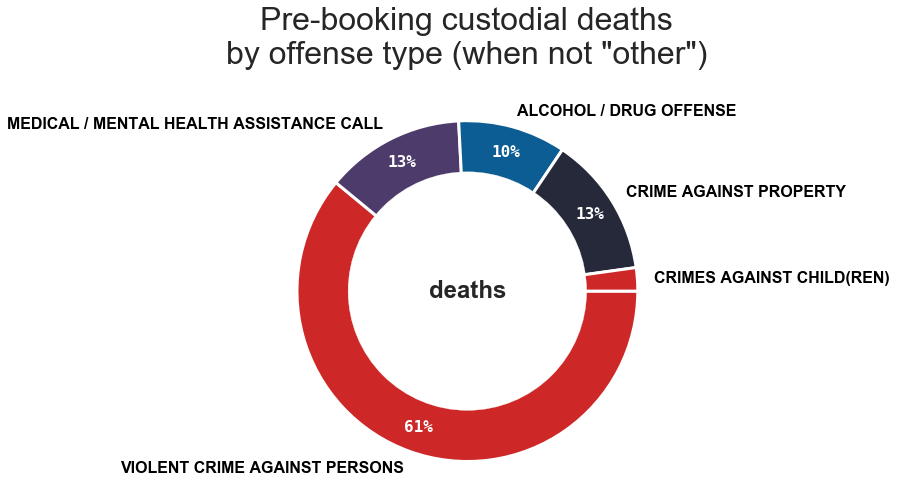

In [76]:
fig, ax = pie_plot(frame, donut=True, figsize=(7, 7),
                   label_size=16,
                   min_pct_for_label=4,
                   colors=[TJI_RED, TJI_PURPLE, TJI_BLUE, TJI_DEEPBLUE])
ax.set_title('Pre-booking custodial deaths\nby offense type (when not "other")\n', fontsize=32)